In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
meta_data_samples = pd.read_table("../data/metadata_erik.txt", sep=" ")
meta_data_males = meta_data_samples[(meta_data_samples['Sex'] == 'M') & (meta_data_samples['Genus'] == 'Papio')]

In [4]:
fs_out = pd.read_table("../steps/finestructure/test_run_linked.chunkcounts.out", sep=" ", header = 1, index_col = 0)

## Heatmap

In [5]:
pop_df = meta_data_males.set_index('PGDP_ID')
species = pop_df['C_origin']
species_reindexed = species.reindex(fs_out.index)

In [6]:
clusters = species_reindexed.unique()
palette = sns.color_palette("tab10")
color_mapping = dict(zip(clusters, palette))
cluster_colors = species_reindexed.map(color_mapping)

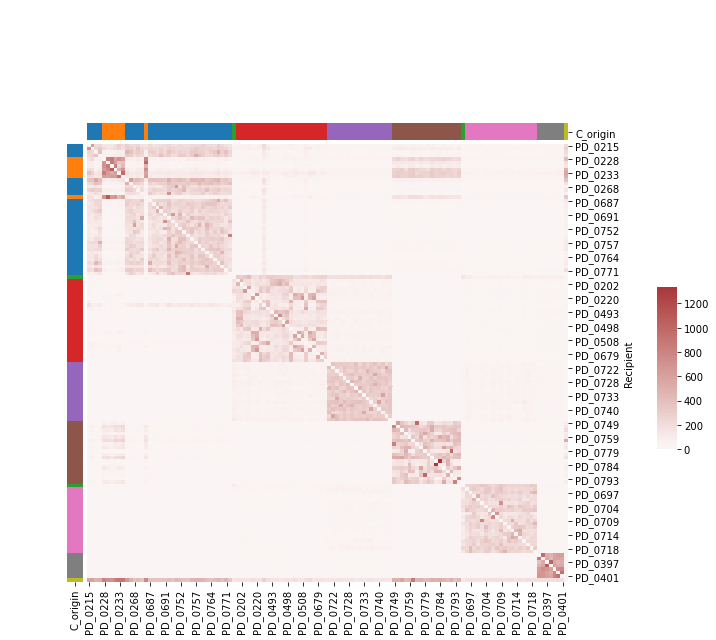

In [7]:
g = sns.clustermap(fs_out, cmap="vlag", center=0,
                   row_colors=cluster_colors,
                   col_colors=cluster_colors,
                   row_cluster=False, col_cluster = False,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(1.02, .3, .03, .25),
                   figsize=(9, 9))